<br>

<center>

# The Data Science Process

</center>

<br>

---

A quick look at the OSEMN process for doing data science


<center>
<img src="./images/ds_process_2.png" alt="Fig 3-2 OSEMN Things" style="width: 1000px">
</center>


Broadly, it consists of the following steps

| Step          | Task                                     |
| :------------ | :--------------------------------------- |
| 1.  Question  | Clearly define the business problem      |
| 2.  Get Data  | Obtain data from internal/external sources, APIs |
| 3.  Wrangle   | Clean messy data. Engineer features. Summarize, aggregate data. |
| 4.  Explore   | Visualize distributions. Investigate relationships. Build intuition for subsequent steps. |
| 5.  Model     | Build and Tune models. Select the best from competing statistical models. |
| 6.  Interpret | Assess model performance on out-of-sample data. Understand results. Draw Insights. |
| 7.  Deploy    | Productionalize your analysis. Build a data product. |

<br>

In this section, we will focus on **#2 - Get Data** and **#3 - Wrangle** above. 
But before we begin, a word of caution. 

Raw data in the real-world is often *messy* and before we conduct any analysis on the data, we must first make it *tidy*. Cleaning data can be a tedious and repetitive task, and handling this problem inefficiently may lead to great exasperation.

It is for these reasons that data preparation has often been labeled by various practitioners as

>  the *least sexy, most time & labour intensive* task in data science.

<br> 

<center>
<img src="./images/ds_time_spent.png" width="900px">
</center>

<br>

---
# Tidy Data

If you've ever taken a MOOC or undergraduate course in data analysis, chances are that you received a neatly formatted csv file to begin with. In the real world however, that almost never happens.

Here are some of the more commonly observed patterns in unclean data.

* Column names are missing or gibberish 
* Data from multiple variables are concatenated into a single column
* **Missing data** are encoded in different ways 
* Features are stored using varying units of measurement
* **Outliers** 

There are **strategies** to deal with each one of these patterns. The following sections will introuce you to the tools and techniques you can use to perform these janitorial duties. Most of these tasks will be performed in Python using the `pandas` library.

Once the data is clean it may still require more work before it can be used to create meaningful visualizations or for building machine learning models. This is where we perform advanced *data wrangling* tasks such as 

* **Reshaping** long-data to wide-data 
* **Subsetting** data to retain relevant rows and/or columns 
* **Aggregating** data using the `split-apply-combine` strategy 
* **Sorting , Merging** to combine data from different sources

If you persevere through these steps, you should have a `tidy` dataset that satisfies the criterion laid down by Hadley Wickham, and makes it easy to carry out data analysis. 

- Observations are in rows
- Variables are in columns
- Entities of one kind to be contained in a single dataset (ex. customers, transactions)

<br>

---

<br>

<center>

# Pandas: Part 1

</center>

<br>

---

**Pandas** is a free, open-source data science library aimed at quick and simplified data munging and exploratory analysis in Python. <br><br> Specifically, it provides high-level data structures like the `DataFrame` (similar to the R `data.frame`) and `Series` (one-dimensional structure with an index) which have rich methods for tackling the entire spectrum of data munging tasks. Additionally, `pandas` has specialized methods for manipulating and visualizing numerical variables and time series data. 

Pandas creator Wes McKinney started building the library in 2008 during his time at an investment management firm. He was motivated by a need to address a distinct set of data analysis requirements that were not fully satisfiedby any one tool at his disposal at the time.

<br>

> Python had long been great for data munging and preparation, but less so for data analysis and modeling. Pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language.

<br>

# Pandas, an introduction

Pandas is built on top of numPy, and is designed to eliminate the need for writing loops for any filtering or aggregation work. It is implemented in C, so is around 15x faster than base python.

Key Features

* Easy handling of ***missing data.*** (`dropna, fillna, ffill, isnull, notnull`)

* Simple ***mutations*** of tables (add/remove columns)

* Easy ***slicing*** of data (fancy indexing and subsetting)

* Automatic ***data alignment*** (by index)

* Powerful ***split-apply-combine*** (`groupby`)

* Intuitive ***merge/join*** (`concat, join`)

* Reshaping and ***Pivoting*** (`stack, pivot`)

* ***Hierarchical Labeling*** of axes indices

* Robust ***I/O tools*** to work with csv, Excel, flat files, ***databases and HDFS***

* Integrated ***Time Series*** Functionality

* Easy plotting (`plot`)

Pandas is built on a solid foundation of NumPy arrays, and is optimized for performance (pandas is about 15x faster), with essential code pieces written in Cython or C. NumPy’s `ndarray` and its broadcasting capabilities are leveraged extensively. 

The documentation is available [here](http://pandas.pydata.org)

---

<br> <br>

<center>

# Getting Data into Pandas

</center>

<br> <br>

We start, as always, by importing modules and frequently used classes from the module. 
As per convention, we write

```python
import pandas as pd
from pandas import Series, DataFrame
```
<br>

---
## Reading Flat Files

`pandas` has functions such as `read_csv, read_table, read_fwf` and `read_clipboard` for reading tabular data into a `DataFrame` object. These functions take as arguments the following options:

<br>

*Which columns to consider?*   
* Import the header (`header=`) or provide column names (`names=`)
 
*Type inference and conversion*
* Processing dates, combining date and time

*Which column serves as the index?* (`index_col=`)
* For a hierarchical index, pass a list of column names

*Which values to interpret as missing data?* (`na_values=`)
* If there are multiple sentinels for missing data, pass a dictionary

*If the file is too large, read chunks iteratively* (`nrows=` and `chunksize=`)
* This option is particularly helpful if you're working with files whose size runs into several gigabytes.

Skipping over rows (`skiprows=`)
* Sometimes data files have metadata in the first few lines before the actual data. 

Interpreting decimal numbers (points or commas to mark thousands)
* Depending on where you are in the world, floating point numbers are written differently. For ex. The value of pi is written as 3.142 in India and most places, while in Europe you would write it as 3,142

<br>

---
## CSV files

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

Syntax:

```python
 pd.read_csv(filepath, sep=, header=, names=, skiprows=, na_values= ... ) 
```

These functions are also able to pull data from a URL. Just use the URL in place of `filepath` 

<br>

---
## Excel Files

Pandas allows you to read and write Excel files, so you can easily read from Excel, write your code in Python, and then write back out to Excel - no need for VBA. Reading Excel files requires the xlrd library. 

You can install it via pip (`pip install xlrd`).

```python
football = pd.read_excel('path_to_excel_file.xlsx', 'sheet1')
```

<br>

---
## SQL Databases

`pandas` also has great support for reading or writing data directly from or to a database. The workflow consists of 

- *setting up a connection* to the database using add-on libraries like `sql-alchemy` and `psycopg2` that help in establishing connections to databases like RDBMS and Redshift. 
- *and then passing a SQL query over that connection* to the database. The query results, usually in tabular format, are returned to `pandas` as a `DataFrame` object.


```python
import sqlite3 

conn = sqlite3.connect('my-sqlite-database.db')
query = "SELECT * FROM my-sqlite-database LIMIT 10;"

df = pd.read_sql(query, con=conn)
```

<br>

---
## Reading from the Clipboard

Sometimes we need to quickly import data from an HTML table or an Excel sheet without needing to import the entire page or workbook. We could then just highlight the required data, hit `CTRL + C`, move over to pandas and run `pd.read_clipboard()`. It may be prudent, after the data is imported into your workspace, to back it up using DataFrame methods like `to_csv`

```python
df = pd.read_clipboard()
```

<br>

---
## Using `bash` commands to peek at the data

One handy feature of Jupyter is that you can issue shell commands from any cell by using the `!` 

This allows us to use shell functions like `head` and `wc` to glance at our data before importing it

This way we can

- decide which delimiter is appropriate
- check if there are extra rows in the file before the table starts
- see if there are any special characters and select an appropriate encoding
- check if the file is too large and might need to be imported in chunks due to RAM constraints

Example

```bash
wc -l mydata.csv
head -n 10 mydata.csv
```

<br>

---


Now let's see some of these  in action.

In [2]:
!pwd

/Users/dush/2025-26_CST4150_PyMLandAI4FinTech/02 Numpy & Pandas


In [3]:
!ls

Numpy-v2.ipynb    Pandas-1-v2.ipynb Pandas-2.ipynb    data
Numpy.ipynb       Pandas-1.ipynb    Pandas-3.ipynb    images


In [4]:
# Inspect file without importing it using bash commands

# number of rows
!wc -l ./data/titanic.csv 

     892 ./data/titanic.csv


In [1]:
# first 10 rows
!head -10 ./data/titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


**Now let's start writing some pandas code**

In [5]:
import os
import sqlite3 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from pandas import Series, DataFrame

In [7]:
df_titanic = pd.read_csv('./data/titanic.csv', delimiter=',')

In [8]:
type(df_titanic)

pandas.core.frame.DataFrame

In [9]:
df_titanic.shape

(891, 12)

In [12]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [13]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
df_titanic.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [14]:
conn = sqlite3.connect('./data/towed.db')

In [33]:
type(df_towed
  .loc[:, 'make']
  .value_counts()
  # .head(5)
  # .plot
  # .barh()
)

pandas.core.series.Series

In [17]:
# Import data from sql

df_towed = pd.read_sql(sql="SELECT * FROM towed;", 
                       con=conn)

In [ ]:
pd.read_sql("SELECT distinct make, count(*) as num_vehicles from towed group by 1 order by 2 desc limit 10", conn)

In [28]:
pd.read_sql("""
SELECT 
    distinct make, 
    count(*) as num_vehicles 
from 
    towed 
group by 1 
order by 2 desc 
limit 10
""", conn)

,make,num_vehicles
0,CHEV,870
1,FORD,605
2,DODG,386
3,PONT,368
4,TOYT,292
5,BUIC,283
6,NISS,273
7,HOND,251
8,CHRY,195
9,OLDS,144


<br>

<center>

# Pandas Data Structures

</center>

<br>

---

Pandas has two **workhorse** **data structures** – *Series* and *DataFrame* - that provide robust and easy-to-implement solutions to many data analysis tasks. These are built on top of NumPy arrays and inherit many of their methods and functions.

Operations using these structures include 

||||||
| ---------- | ------------- | ----------- | -------- | --------- |
| **CREATE**     | **SUBSET**        | **INSERT**      | **UPDATE**   | **VIEW**      |
| **FILTER** | **APPEND**    | **SORT**    | **JOIN** | **MERGE** |
| **GROUP**  | **SUMMARIZE** | **RESHAPE** | **MAP**  | **APPLY** |


## Series 

A `Series` is a one-dimensional, homogeneous array-like data structure containing a vector of data (of any valid NumPy type) and an associated array of data labels, called its *index*.

### Creating a Series

A Series can be created by calling the `pd.Series()` function on a NumPy 1D array or a Python collection like `list, tuple,` or `dictionary`. The index of the Series could be constructed in the same way from one of these objects. If the index isn't explicitly specified, a numeric vector from 0 to length-1 is automatically generated as the index. Additionally, the user may specify the *type* and a *name* while declaring a Series.

**Syntax**

```python
pd.Series(data=, index=, dtype=, name=)
```

**Examples**

```python
# Basic Series with no explicit index from an array 
In []: series_1 = pd.Series(np.random.random(5).round(2))
In []: series_1
Out[]: 
0    0.03
1    0.94
2    0.69
3    0.16
4    0.61
dtype: float64
```

Here, we created a series called *series_1* using an array of 5 elements filled with random numbers. The type was induced from the data to be *float64* and a numeric index was automatically generated.  Note that this series has no *name.*

```python
# Series with an explicit index, dtype and name specification
In []: series_2 = pd.Series(np.random.randint(0, 100, 5),
                            index=list('abcde'),
                            dtype=float,
                            name='S2') 
In []: series_2
Out[]: 
a    60.0
b    13.0
c    54.0
d    13.0
e    65.0
Name: S2, dtype: float64
```

Here, we create a series of random integers, but convert the type to *float* explicitly. The automatic index is replaced by the one we provide. The name *S2* is important as it will become the column name if this `Series` is imported or concatenated into a `DataFrame`.

```python
# From a numeric list
In []: pd.Series([-55, 4, 79, 101])
Out[]: 
0    -55
1      4
2     79
3    101
dtype: int64

# From a tuple
In []: pd.Series((1, 2, 3, 4))
Out[]: 
0    1
1    2
2    3
3    4
dtype: int64

# From a dictionary
# Note that when we use a Python dict to create a Series, the keys become the index.
In []: pd.Series({'a': 101, 'b': -55, 'c': 79, 'd': 4})
Out[]: 
a    101
b    -55
c     79
d      4
dtype: int64
```

<br>

Let's see this in action:



In [34]:
x_random = np.random.randn(10).round(2)

print(type(x_random))
x_random

<class 'numpy.ndarray'>


array([ 0.86, -0.62,  0.99,  0.69, -0.86,  2.93, -0.24,  0.62, -1.55,
        0.22])

In [37]:
pd.Series(
    data=x_random, 
    name='my_series_1',
    dtype=float,
    index=['ind_' + str(i) for i in range(10)]
)

ind_0    0.86
ind_1   -0.62
ind_2    0.99
ind_3    0.69
ind_4   -0.86
ind_5    2.93
ind_6   -0.24
ind_7    0.62
ind_8   -1.55
ind_9    0.22
Name: my_series_1, dtype: float64

In [ ]:
s_random = pd.Series(x_random)
# no index specified, numeric will be automatically generated

print(type(s_random))
s_random

In [ ]:
# passing an index specifically
my_series = pd.Series(x_random, index=list('aabbbccdef'))

my_series

In [38]:
# Using a list, tuple or dict

dict_1 = {v: k for k, v in zip(np.random.random(10).round(2), list('abcdefghij'))}
dict_1

{'a': np.float64(0.74),
 'b': np.float64(0.88),
 'c': np.float64(0.84),
 'd': np.float64(0.34),
 'e': np.float64(0.75),
 'f': np.float64(0.84),
 'g': np.float64(0.45),
 'h': np.float64(0.94),
 'i': np.float64(0.07),
 'j': np.float64(0.54)}

In [39]:
pd.Series(dict_1)

a    0.74
b    0.88
c    0.84
d    0.34
e    0.75
f    0.84
g    0.45
h    0.94
i    0.07
j    0.54
dtype: float64

In [ ]:
pd.Series(data=[1, 2, 3], 
       index=list('abc'), 
       name='Series_1', 
       dtype=float)

In [ ]:
pd.Series(data=(1, 2, 3), 
       index=list('abc'), 
       name='Series_1', 
       dtype=np.int64)

In [ ]:
Series({'a': 1, 'b': 2, 'c':3}, dtype=str)

In [ ]:
df_towed.sample(10)

<br>

---
### Series Attributes

Just like attributes for primitive Python data structures like `Lists` or `Dictionaries` provide useful metadata about the contents of the data structure, we can use `Series` attributes like `values,  index, shape` to get the underlying array, the index and the length of the series respectively.

```python
In []: series_2
Out[]:
a    34.0
b    60.0
c    21.0
d    22.0
e     7.0
Name: S2, dtype: float64
        
# Get the underlying NumPy array
In []: series_2.values
Out[]: array([ 34.,  60.,  21.,  22.,   7.])

# Get the index
In []: series_2.index
Out[]: Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

# Get the size on disk
In []: series_2.nbytes
Out[]: 40

# Get the number of elements
In []: series_2.shape
Out[]: (5,)
```

In [ ]:
pd.Series(data=np.arange(5), index=list('uvwxy'))[['w', 'x']]

## Subsetting a Series

There are many ways to extract subsets of a Series in Pandas. In addition to allowing NumPy-like subsetting using integer lists and slices, it is possible to subset a Series using 

* *label-based indexing* by passing index labels associated with the values
* *fancy indexing* using methods like `loc, iloc, ix, at, iat`
* *boolean indexing* for subsetting with logical arrays

Example: Label and integer based indexing on a *Breakfast Menu* 

```python
In [16]: menu = Series({'ham': 1, 'eggs': 3, 'bacon': 2, 
                        'coffee': 1, 'toast': 0.5, 'jam': 0.2})
In [17]: menu
Out[17]: 
bacon     2.0
coffee    1.0
eggs      3.0
ham       1.0
jam       0.2
toast     0.5
dtype: float64

# A single label
In [18]: menu['bacon']
Out[18]: 2.0

# A list of labels    
In [19]: menu[['eggs', 'bacon']]
Out[19]: 
eggs     3.0
bacon    2.0
dtype: float64
```

```python
# A slice of labels
In [20]: menu['bacon':'eggs']
Out[20]: 
bacon     2.0
coffee    1.0
eggs      3.0
dtype: float64

# Another label slice
In [21]: menu['ham':]
Out[21]: 
ham      1.0
jam      0.2
toast    0.5
dtype: float64

# Positional Slicing
In [22]: menu[0:3]
Out[22]: 
bacon     2.0
coffee    1.0
eggs      3.0
dtype: float64
```

### Subsetting with *fancy indexing* methods  

  * `.loc()  ` for label based subsetting
  * `.iloc()` for integer based subsetting

  Note that other methods such as `.ix()` and `.at(), .iat()` exist, but they serve the same purpose. So we will leave it to the reader to explore these functions in the documentation and pick the one they feel most productive in using. 

```python
# Using loc
In [30]: menu.loc['coffee']
Out[30]: 1.0

In [31]: menu.loc['eggs':'jam']
Out[31]: 
eggs    3.0
ham     1.0
jam     0.2
dtype: float64

# Using iloc    
In [32]: menu.iloc[3]
Out[32]: 1.0

In [33]: menu.iloc[2:4]
Out[33]: 
eggs    3.0
ham     1.0
dtype: float64

```

### Boolean indexing 

- Works in the same way as it does for subsetting NumPy arrays. 

- We create a boolean of the same length as the Series, (using the same Series), and then pass the boolean to the squre bracket subsetter. 

```python
# Create a boolean series using a logical comparison
In [35]: menu > 1
Out[35]: 
bacon      True
coffee    False
eggs       True
ham       False
jam       False
toast     False
dtype: bool

# Subset the series using the boolean to retain values where True
In [36]: menu[menu > 1]
Out[36]: 
bacon    2.0
eggs     3.0
dtype: float64

# We can also pass any arbitrary boolean (needs to be of the same length)     
In [37]: menu[[True, True, False, False, True, False]]
Out[37]: 
bacon     2.0
coffee    1.0
jam       0.2
dtype: float64
```

<br>

Practice subsetting with the code below:

In [40]:
my_series = pd.Series(data=np.random.randn(5).round(2), index=list('abcde'))
my_series

a    1.30
b    1.20
c    0.01
d   -0.47
e   -1.02
dtype: float64

In [45]:

my_series[1:3]


b    1.20
c    0.01
dtype: float64

In [47]:

my_series[2:-1]


c    0.01
d   -0.47
dtype: float64

In [41]:
# One Label
my_series['a']

np.float64(1.3)

In [42]:
# List of Labels
my_series[['a', 'b']] 

a    1.3
b    1.2
dtype: float64

In [43]:
# Label Slice
my_series['b':'d']

b    1.20
c    0.01
d   -0.47
dtype: float64

In [44]:
# positional slicing
my_series[:3]

a    1.30
b    1.20
c    0.01
dtype: float64

In [ ]:
my_series[1:4]

In [ ]:
my_series[::-1]

In [ ]:
my_series[::-2]

In [ ]:
my_series.loc[['a', 'c', 'e']]

In [ ]:
my_series.iloc[2:4]

---

Detour:: MARKDOWN SHORTCUTS

Command mode = press escape or click outside a cell

m for markdown
y for python/code
r for raw

a to add a new cell above
b to add a new cell below
dd to delete a cell

to run a cell - SHIFT + ENTER

---

<br>

---
## Series Methods

We've just seen a few `Series` methods that allow us to subset data. There's a variety of other methods that are useful across the entire spectrum of data wrangling tasks. The figure below shows an exhaustive list of all methods. We will discuss some of the most important ones of these here, and encourage the readers to peruse the latest pandas documentation to explore other methods.

![80% center](./images/Series_methods.png)

It is impossible to remember each by heart, so we will rely on our old friend `?` to ask for help

`pd.Series.<unknown-method>?`


---
### Peeking at the data

* `head and tail`  are used to view a small sample of a Series or DataFrame object, use the [`head()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html#pandas.DataFrame.head) and [`tail()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html#pandas.DataFrame.tail) methods. The default number of elements to display is five, but you may pass a custom number.

```python
In [44]: series_8 = Series(np.random.randn(1000).round(2))

In [45]: series_8.head()
Out[45]: 
0   -0.23
1    0.55
2    0.77
3    0.18
4    0.76
dtype: float64

In [46]: series_8.tail()
Out[46]: 
995    0.66
996   -0.48
997    1.13
998    1.05
999    1.61
dtype: float64
```

---
### Type Conversion

* `astype` explicitly convert dtypes from one to another

```python
In [51]: series_8.head()
Out[51]: 
0   -0.23
1    0.55
2    0.77
3    0.18
4    0.76
dtype: float

In [52]: series_8.astype(str).head()
Out[52]: 
0    -0.23
1     0.55
2     0.77
3     0.18
4     0.76
dtype: object
```

---
### Treating Outliers

* `clip()` can be used to clip outliers at a threshold value. All values lower than the one supplied to `lower=`, or higher than the one supplied to `upper=` will be replaced by that value. Note how the values in *series_8* below are clipped at the supplied threshold of `0.50`

```python
In [54]: series_8.head().clip(upper=.50)
Out[54]: 
0   -0.23
1    0.50
2    0.50
3    0.18
4    0.50
dtype: float64

In [55]: series_8.head().clip(lower=.50)
Out[55]: 
0    0.50
1    0.55
2    0.77
3    0.50
4    0.76
dtype: float64
```

This function is especially useful in **treating outliers** when used in conjunction with `.quantile()` 
**Note**: In data wrangling, we generally clip values at the 1st-99th Percentile (or the 5th-95th percentile)



In [48]:
srs_1 = pd.Series(data=np.random.randn(1000))

<Axes: ylabel='Frequency'>

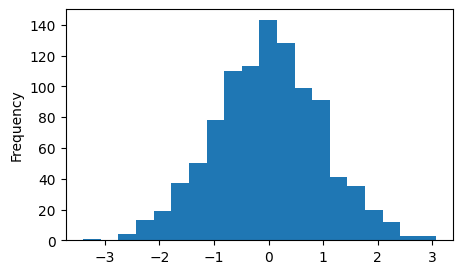

In [49]:
srs_1.plot.hist(bins=20, figsize=(5, 3))

In [64]:
df_titanic['Name'].head(5)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [67]:
df_titanic['Name'].head(5).map(lambda x: "Female" if ('Mrs' in x or 'Miss' in x) else "Male")

0      Male
1    Female
2    Female
3    Female
4      Male
Name: Name, dtype: object

In [ ]:
(srs_1
 .clip(upper=srs_1.quantile(0.97))
 .clip(lower=srs_1.quantile(0.03))
 .plot
 .hist(bins=20, figsize=(5, 3)))

---
### Replacing Values

* `replace` is an effective way to replace source values with target values by suppling a dictionary with the required substitutions. 

```python
In [60]: fruits = Series(['apples', 'oranges', 'peaches', 'mangoes'])
In [61]: fruits
Out[61]: 
0     apples
1    oranges
2    peaches
3    mangoes
dtype: object

In [62]: fruits.replace({'apples':'grapes', 'peaches':'bananas'})
Out[62]: 
0     grapes
1    oranges
2    bananas
3    mangoes
dtype: object
```

In [ ]:
{'AAPL': 'Apple Inc', 'MSFT': 'Microsoft'}

---
### Checking if values belong to a list

* `isin` produces a boolean by comparing each element of the Series against the provided list. It takes `True` if the element belongs to the list. This boolean may then be used for subsetting the Series. 

```python
In [64]: fruits.isin(['mangoes', 'oranges'])
Out[64]: 
0    False
1     True
2    False
3     True
dtype: bool
```

In [ ]:
# booleans can be summed or averaged
pd.Series(['apples', 'oranges', 'peaches', 'mangoes']).isin(['peaches', 'mangoes']).sum()

---
### Finding uniques and their frequency

* `unique, nunique, value_counts` These methods are used to find the array of distinct values in a categorical Series, to count the number of distinct items, and to create a frequency table respectively.

```python
In [68]: series_9 = Series(list('abcd' * 3))
In [69]: series_9
Out[69]: 
0     a
1     b
2     c
3     d
4     a
5     b
6     c
7     d
8     a
9     b
10    c
11    d
dtype: object

In [70]: series_9.unique()
Out[70]: array(['a', 'b', 'c', 'd'], dtype=object)

In [71]: series_9.nunique()
Out[71]: 4
    
In [72]: series_9.value_counts()
Out[72]: 
d    3
b    3
c    3
a    3
dtype: int64
```

All three of these methods prove indespensible while performing visualization and exploratory data analysis (EDA) tasks. 
For ex. The output produced by `value_counts()` helps us plot bar-charts.

In [75]:
df_titanic['Embarked'].fillna('MISSING').value_counts()

Embarked
S          644
C          168
Q           77
MISSING      2
Name: count, dtype: int64

---
### Dealing with Duplicates

* `duplicated` produces a boolean that marks every instance of a value after its first occurrence as True. `drop_duplicates` returns the Series with the duplicates removed. 
  * If you want to drop duplicated permanently, pass the `inplace=True` argument.

```python
In [88]: series_9.duplicated()
Out[88]: 
0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
dtype: bool

In [89]: series_9.drop_duplicates()
Out[89]: 
0    a
1    b
2    c
3    d
dtype: object
```

In [ ]:
series_9 = pd.Series(list('abcd' * 3))

In [ ]:
series_9.shape

In [ ]:
series_9.drop_duplicates(inplace=True)

In [ ]:
series_9.shape

In [94]:
(df_titanic
  .set_index('Name')
  .query("Fare > 0")
  .loc[:, 'Fare']
  .nsmallest(5)
  .round())

Name
Betros, Mr. Tannous                 4.0
Carlsson, Mr. Frans Olof            5.0
Nysveen, Mr. Johan Hansen           6.0
Lemberopolous, Mr. Peter L          6.0
Holm, Mr. John Fredrik Alexander    6.0
Name: Fare, dtype: float64

In [95]:
(df_titanic
  .set_index('Name')
  .query("Fare > 0")
  .loc[:, 'Fare']
 .idxmin()
)

'Betros, Mr. Tannous'

---
### Sorting the data

* `sort_values`, `sort_index` help in sorting a Series by values or by index in desired order. The `ascending=` argument controls the nature of the sort. 

  >  *[Note] In order to make the sorting permanent, we need to pass the `inplace=True` argument. The default value `inplace=False` returns a copy of the Series with the changes made, but the original remains intact. Many other methods like `drop_duplicates` also take this paramter.*

```python
In [82]: series_10.sort_values()
Out[82]: 
y     5
c     5
a    12
x    21
z    28
b    45
dtype: int64    

In [83]: series_10.sort_index()
Out[83]: 
a    12
b    45
c     5
x    21
y     5
z    28
dtype: int64
```


In [ ]:
srs_1.head(10).sort_values(ascending=False)

In [ ]:
srs_1.sample(10).sort_index()

---
### Finding the largest/smallest values

* `idxmax, idxmin, nlargest, nsmallest` As their names imply, these methods help in finding the largest, smallest, n-largest and n-smallest respectively. Note that the index label is returned with these values, and this can be especially helpful in EDA.

```python
In [76]: series_10 = Series(np.random.randint(0, 50, 6), index=list('xyzabc'))

In [77]: series_10
Out[77]: 
x    21
y     5
z    28
a    12
b    45
c     5
dtype: int64

In [78]: series_10.idxmax()
Out[78]: 'b'

In [79]: series_10.idxmin()
Out[79]: 'y'

In [80]: series_10.nlargest(2)
Out[80]: 
b    45
z    28
dtype: int64
```

In [111]:
df_titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

---
### Mathematical Summaries

* `mean, median, std, quantile, describe ` are mathematical methods employed to find the measures of central tendency for a given set of data points. `quantile` finds the requested percentiles, whereas `describe` produces the summary statistics for the data.
  These functions come in handy when we're exploring data for patterns.

```python
# Create a long series with numeric values
In [108]: series_11 = Series(np.random.randn(1000))

In [109]: series_11.head()
Out[109]: 
0   -0.808280
1   -0.361064
2    1.098265
3   -0.400104
4   -0.401763
dtype: float64

In [110]: series_11.mean()
Out[110]: 0.010034515870708844

In [111]: series_11.std()
Out[111]: 0.9999153362726881

In [112]: series_11.median()
Out[112]: 0.008293242730166963

# Find the 10th, 50th and 80th percentile    
In [113]: series_11.quantile([0.10, 0.50, 0.80])
Out[113]: 
0.1   -1.290976
0.5    0.008293
0.8    0.854793
dtype: float64

# Get all summary statistics
In [114]: series_11.describe()
Out[114]: 
count    1000.000000
mean        0.010035
std         0.999915
min        -3.095835
25%        -0.665170
50%         0.008293
75%         0.693991
max         3.762116
dtype: float64
```

In [124]:
df_titanic['Embarked'].fillna("MISSING").unique()

array(['S', 'C', 'Q', 'MISSING'], dtype=object)

In [98]:
df_titanic['Fare'].median()

np.float64(14.4542)

### Dealing with missing data

* `isnull, notnull ` are complementary methods that work on a Series with missing data to produce a boolean Series that identifies missing or non-missing values respectively. 

>  Note that both the NumPy `np.nan` and the base Python `None` type are identified as missing values.

```python
In [93]: series_12 = Series([1.12, 3.14, np.nan, 6.02, 2.73, None])

In [94]: series_12
Out[94]: 
0    1.12
1    3.14
2     NaN
3    6.02
4    2.73
5     NaN
dtype: float64

# Mark the missing values as True
In [95]: series_12.isnull()
Out[95]: 
0    False
1    False
2     True
3    False
4    False
5     True
dtype: bool

# Mark the non-missing values as True     
In [96]: series_12.notnull()
Out[96]: 
0     True
1     True
2    False
3     True
4     True
5    False
dtype: bool
```

These functions may be used in conjunction with `sum` and `mean` to find the number or proportion of missing values in each variable of the imported data. Generally, variables with more than 70- 80% missing values are not useful in data analysis.

```python
# find number of missing values
series_12.isnull().sum()

# find percentage of missing values
series_12.isnull().mean()
```

In [129]:
df_titanic.dropna(subset='Embarked')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


---
### Missing Values Imputation

* `fillna, ffill and bfill, dropna` This set of Series methods allow us to deal with missing data by choosing to either impute them with a particular value, or by copying the last known value over the missing ones (typically used in time-series analysis.) 
  We may sometimes want to drop the missing data altogether and `dropna` helps us in doing that.

> [Note] It is a common practice in data science to replace missing values in a numeric variable by its mean (or median if the data is skewed) and in categorical variables with its mode.

```python
In [118]: series_12 = Series([1.12, 3.14, np.nan, 6.02, 2.73, None])

# Replace missings with 0
In [119]: series_12.fillna(0)
Out[119]: 
0    1.12
1    3.14
2    0.00s
3    6.02
4    2.73
5    0.00
dtype: float64

# Replace missings with the mean    
In [120]: series_12.fillna(series_12.mean())
Out[120]: 
0    1.1200
1    3.1400
2    3.2525
3    6.0200
4    2.7300
5    3.2525
dtype: float64

# Replicate the last non-missing value over the missing ones    
In [121]: series_12.ffill()
Out[121]: 
0    1.12
1    3.14
2    3.14
3    6.02
4    2.73
5    2.73
dtype: float64

# Return a copy of the Series with missing values removed    
In [122]: series_12.dropna()
Out[122]: 
0    1.12
1    3.14
3    6.02
4    2.73
dtype: float64    
```

---
### Apply a function to each element

*  `map` is perhaps the **most important** of all Series methods. It takes a *general-purpose* or *user-defined* function and applies it to each value in the Series. Combined with base Python's *lambda functions*, it can be an incredibly powerful tool in transforming a given Series.


```python
# Let's say we have a list of names stored in a Series
In [125]: series_13 = Series(['Dave Smith', 'Jane Doe', 'Carl James', 'Jim Hunt'])

In [126]: series_13
Out[126]: 
0    Dave Smith
1      Jane Doe
2    Carl James
3      Jim Hunt
dtype: object

# Find the length of each name    
In [126]: series_13.map(lambda x: len(x))
Out[126]: 
0    10
1     8
2    10
3     8
dtype: int64

# Find the initials    
In [127]: series_13.map(lambda x: '.'.join([i[0] for i in x.split(' ')]))
Out[127]: 
0    D.S
1    J.D
2    C.J
3    J.H
dtype: object    
```

In [ ]:
series_13 = pd.Series(['Dave Smith', 'Jane Doe', 'Carl James', 'Jim Hunt'])

In [ ]:
len([1, 2, 3])

In [ ]:
len('dushyant')

In [ ]:
series_13.map(len)

In [ ]:
for name in ['Dave Smith', 'Jane Doe', 'Carl James', 'Jim Hunt']:
    print(name.split(' ')[0])

In [ ]:
[x.split()[0] for x in ['Dave Smith', 'Jane Doe', 'Carl James', 'Jim Hunt']]

In [ ]:
# Extract the first name
series_13.map(lambda x: x.split(' ')[0])

In [ ]:
def get_first_name(name):
    """
    """
    return name.split(' ')[0]

series_13.map(get_first_name)

In [ ]:
series_13.map(lambda i: get_first_name(name=i))

In [ ]:
srs_1.head()

In [ ]:
srs_1.map(lambda x: True if x < 0.05 else False)

In [ ]:
(pd.Series(data=np.random.randint(low=0, high=100, size=100))
 .map(lambda x: np.sqrt(x) if x % 2 == 0 else x * x * x)
)

In [ ]:
pd.Series(data=[1.01, 2.33, 4.33], name='USD').map(lambda x: x * 3.8)

---
### Visualize the Data

* The `plot` method is a gateway to a treasure trove of potential visualizations like histograms, bar charts, scatterplots, boxplots and more. As examples, we will visualize a bar chart for a categorical series and the histogram of a numeric variable.

```python
# Create a categorical series
In [148]: series_14 = Series(list('a' * 3) + list('b' * 5) + list('c' * 9) + list('d' * 2))
    
In [150]: series_14.value_counts().plot.bar()    
```

![](./images/series_plot_2.png)

```python
In [151]: series_15 = Series(np.random.randn(1000))

In [151]: series_15.head()
Out[151]: 
0    1.796526
1    0.323100
2   -1.747839
3   -0.435137
4    0.182139
dtype: float64

In [152]: series_15.plot.hist()
```

![](./images/series_plot_1.png)

There are extensive customiztions that we can make to the aesthetics of these plots. 

In [ ]:
series_14 = pd.Series(list('a' * 3) + list('b' * 5) + list('c' * 9) + list('d' * 2))
series_14

In [ ]:
series_14.value_counts(normalize=True).plot.barh(color='salmon', title='my first chart')

---
### Difference between None and NaN

- `NaN` is a mathematical entity
- `None` is for missing data

In [ ]:
type(np.nan)

In [ ]:
type(None)

In [ ]:
bool('')

In [ ]:
bool('x')

In [ ]:
bool(np.nan)
# Truthiness value of np.nan is True

In [ ]:
bool(None)

In [ ]:
# Series Methods do not discriminate between None and NaN
pd.Series({'a': None, 'c': 101, 'b': np.nan, 'd': 'red'}).isnull()

### Series Practice 

In [ ]:
import pandas as pd

In [ ]:
cities = pd.Series(data=[18, None, 5, None, 13], 
                   index=['DEL', 'BOM', 'BLR', 'DXB', 'BKK'])
cities

In [ ]:
list(zip(cities, cities.isnull()))

In [ ]:
list(zip(cities, cities.notnull()))

In [ ]:
cities[cities.isnull()]

In [ ]:
cities[cities.notnull()]

In [ ]:
# forward fill
cities.ffill()

In [ ]:
cities.bfill()

In [ ]:
cities.median()

In [ ]:
cities.fillna(cities.median())

In [ ]:
pd.Series(list('Dogs are descended from wolves.'))

In [ ]:
# Describe method on char series
pd.Series(list('Dogs are descended from wolves.')).describe()

In [ ]:
srs_str_1 = pd.Series(list('Dogs are descended from wolves.'))

## Task 1 - instead of describe above use value counts and plot a bar chart



## Task 2 - same as 1 above, but first convert everything to uppercase and replace spaces with underscores


In [ ]:
srs_str_1 = pd.Series(list('Dogs are descended from wolves.'))

(srs_str_1   
 .map(str.upper) # each element converted to uppercase
 .replace({' ': '_'}) 
 .value_counts()
 .head(7)
 .plot
 .bar(color='lightgreen', # change the bar's color
      figsize=(5,3),      # change the figure's size
      alpha=0.5,          # transparency at 50%
      ylim=(0, 10))       # y-axis limit between 0 and 10
);

In [ ]:
# Describe method on numeric series

ser_x = pd.Series(np.random.normal(0, 1, 10000))
ser_x.describe().round(2)

In [ ]:
ser_x.describe(percentiles=[0.01, 0.05, 0.97, 0.99])

In [ ]:
ser_x.describe().loc[['min', 'mean', '50%', 'max']]

### Practice: More Series methods using the Titanic Data

In [ ]:
df_x = pd.read_csv('./data/titanic.csv')

In [ ]:
df_x.head()

In [ ]:
type(df_x)

In [ ]:
type(df_x.loc[:, 'Survived'])

In [ ]:
df_x.loc[0, :]

In [ ]:
type(df_x.loc[0, :])

In [ ]:
# value_counts() for frequency tables
df_x['Embarked'].value_counts()

In [ ]:
# type conversion
df_x['PassengerId'].head().astype(float)

In [ ]:
# applying a function to each element of a series
df_x['Fare'].head().map(lambda x: 'AED ' + str(int(x * 3.9)))

In [ ]:
df_x['Sex'].head().map(lambda x: x.upper())

In [ ]:
pd.Series(data=df_x['Fare'].values, index=df_x['Name']).max()

In [ ]:
pd.Series(data=df_x['Fare'].values, index=df_x['Name']).idxmax()

In [ ]:
pd.Series(data=df_x['Fare'].values, index=df_x['Name']).loc['Ward, Miss. Anna']

In [ ]:
# finding where the maximum value occured
fares = pd.Series(df_x['Fare'].values, index=df_x['Name'].values)

print(f"{fares.idxmax()} paid the highest fare of {fares.max()}")

In [ ]:
# sort a series
df_x.loc[:, 'Fare'].sort_values()

In [ ]:
(pd.Series(data=df_x['Fare'].values, index=df_x['Name'])
 .sort_values(ascending=False)
 .head(10)
)

In [ ]:
(pd.Series(data=df_x['Fare'].values, index=df_x['Name'])
 .sort_values()
 .head(10)
)

In [ ]:
df_x['Name'].loc[df_x['Cabin'].notnull()]

In [ ]:
df_x.loc[df_x['Cabin'].isnull(), 'Fare'].mean()

In [ ]:
df_x.loc[df_x['Cabin'].notnull(), 'Fare'].mean()

---

#### Task

Generate a Series of 150 ages with a mean of 35 years. Set every fifteenth value to missing. Find the nex mean. Fill the missing data with (a) mean (b) median, and report the new means

hint: use `np.random.randn` 

In [ ]:
# %load ./scripts/task_missings.py